<a href="https://colab.research.google.com/github/AidaPG/CienciaDatos_Python_V3/blob/main/ML_KidneyStonePrediction_APCH_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Reading the Dataset



### https://www.kaggle.com/datasets/vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis

#  Report on Predicting the Presence of Kidney Stones Based on Urine Analysis

1. Introduction:
The dataset provided for analysis aims to predict the presence of kidney stones in urine samples based on specific physical characteristics. The dataset comprises 79 urine specimens, which were meticulously analyzed to investigate if certain attributes of the urine are related to the formation of calcium oxalate crystals. The six key physical characteristics considered in this study are:

* Specific Gravity: This measures the density of urine concerning water.

* pH: It represents the negative logarithm of the hydrogen ion concentration.

* Osmolarity (mOsm): Osmolarity is a unit used in biology and medicine, indicating the concentration of molecules in the solution.

* Conductivity (mMho): Conductivity, measured in milliMho, is proportional to the concentration of charged ions in the solution.

* Urea Concentration: Urea concentration is expressed in millimoles per liter (mmol/L).

* Calcium Concentration (CALC): Calcium concentration is also measured in millimoles per liter (mmol/L).




In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis

  0% 0.00/1.25k [00:00<?, ?B/s]
100% 1.25k/1.25k [00:00<00:00, 1.87MB/s]


In [ ]:
! unzip kidney-stone-prediction-based-on-urine-analysis.zip

Archive:  kidney-stone-prediction-based-on-urine-analysis.zip
  inflating: kindey stone urine analysis.csv  


In [ ]:
!ls


drive  sample_data


# Step 2: Importing All the Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
# import the metrics class
from sklearn import metrics
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report




In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Step 3: Exploring the Data
##### Before proceeding with any predictive modeling, it is essential to explore the dataset and understand its characteristics. This involves assessing data quality, identifying missing values, and conducting summary statistics. Descriptive statistics and data visualizations will also be beneficial in gaining a preliminary understanding of the dataset.

In [ ]:
df=pd.read_csv('/content/sample_data/kindey stone urine analysis.csv')
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [ ]:
df.value_counts('target')

target
0    45
1    34
dtype: int64

##### There are 34 samples on the data set with kidney stone presence and 45 samples whithout kidney stone presence.

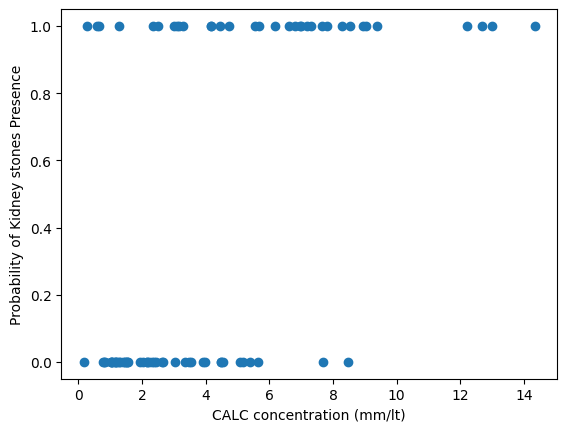

In [ ]:
%matplotlib inline
plt.xlabel('CALC concentration (mm/lt)')
plt.ylabel('Probability of Kidney stones Presence')
plt.scatter(df.calc,df.target)

### As a result of the exploratory analysis of the dataset, the type of regression analysis to be aplied will be:

### **Binary Logistic Regression**: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or Not Cancer. In this case **Presence of Kidney Stones or Not Presence of Kidney Stones**.


#Step 4:Selecting Feature and Target.
##### Feature selection methods will be employed to determine the most relevant physical characteristics that influence the presence of kidney stones. This step is crucial for model accuracy and interpretability.
##### Once the dataset has been analized, and if neccesary cleaned completing or eliminanting non existing values, it is neccesary to divide the columns into two types of variables dependent and independent.

##### X is defined as the independent group of variables or "features"
##### Y is defined as de dependent variable or "target".

In [ ]:
X=df.drop('target', axis=1)
X

,gravity,ph,osmo,cond,urea,calc
0,1.021,4.91,725,14.0,443,2.45
1,1.017,5.74,577,20.0,296,4.49
2,1.008,7.20,321,14.9,101,2.36
3,1.011,5.51,408,12.6,224,2.15
4,1.005,6.52,187,7.5,91,1.16
...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04
75,1.017,4.81,410,13.3,195,0.58
76,1.024,5.40,803,21.8,394,7.82
77,1.016,6.81,594,21.4,255,12.20


In [ ]:
y=df['target']
y

0     0
1     0
2     0
3     0
4     0
     ..
74    1
75    1
76    1
77    1
78    1
Name: target, Length: 79, dtype: int64

# Step 5. Splitting the dataset into the Training set and Test set
##### To understand the model performance I divided the dataset into a training set and a test set.
##### I pass 4 parameters: features, target, test_set size and random_state to select records randomly.
##### The dataset is divided in two parts in a ratio of 75:25 (i.e. 75% data will be used for model training and 25% for model testing)

######Parameters:

######*  arrays : sequence of indexables with same length / shape[0]
Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
######*  test_size:float or int, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
######*  train_size:float or int, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.
######*   random_state:int, RandomState instance or None, default=None
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary.
######*   shuffle:bool, default=True
Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
######*  stratify:array-like, default=None






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
y_test

49    1
27    0
30    0
63    1
45    1
69    1
74    1
76    1
48    1
57    1
40    0
62    1
2     0
71    1
56    1
34    0
3     0
22    0
7     0
26    0
Name: target, dtype: int64

# Step 6. Training the **Binary** Logistic Regression model on the Training Set.
##### Fit of the model on the train set using fit().

In [ ]:
Logreg=LogisticRegression(random_state=16, max_iter=200).fit(X_train, y_train)


# Step 7 : Exploring  the  Results
 ####  Model evaluation and validation are carried out to ensure the chosen model's performance

In [ ]:
Y_pred=Logreg.predict(X_test)
print('mse=', mean_squared_error(y_test,Y_pred))
Y_pred

mse= 0.15


array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

# Step 7.1 Model Evaluation using Confusion Matrix
##### The fundamental of a confusion matrix is the number of correct and incorrect predictions sumarizing the results of each one.
##### It consists of four fundamental elements:

True Positives (TP): These are cases where the model correctly predicted the positive class (e.g., a disease is present), and the actual class is also positive.

True Negatives (TN): These are cases where the model correctly predicted the negative class (e.g., no disease), and the actual class is also negative.

False Positives (FP): These are cases where the model incorrectly predicted the positive class when the actual class is negative. This is also known as a Type I error.

False Negatives (FN): These are cases where the model incorrectly predicted the negative class when the actual class is positive. This is also known as a Type II error.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

array([[8, 1],
       [2, 9]])

# Step 7.2 Confusion matrix heat map.
##### The heatmap is annotated with the values in the matrix and colored using the YlGnBu colormap.
##### The heatmap use matplotlib's heatmap function, passing in a pandas DataFrame containing the confusion matrix as an argument.
##### The sumarized TP, TN, FP and FN are displayed on each quadrant of the map.

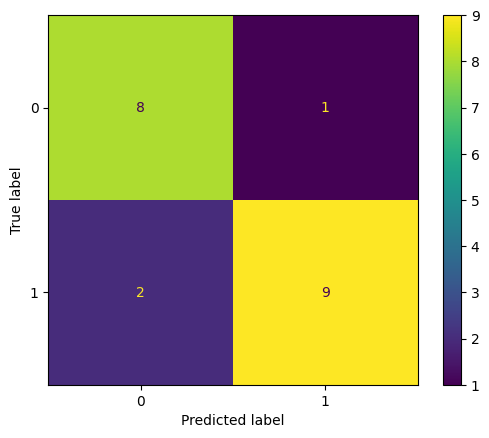

In [ ]:
SVC(random_state=0)
predictions=Logreg.predict(X_test)
cm= confusion_matrix(y_test, predictions, labels=Logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Logreg.classes_)
disp.plot()
plt.show()

In [ ]:
target_names = ['without kidney stones', 'with kidney stones']
print(classification_report(y_test, Y_pred, target_names=target_names))

                       precision    recall  f1-score   support

without kidney stones       0.80      0.89      0.84         9
   with kidney stones       0.90      0.82      0.86        11

             accuracy                           0.85        20
            macro avg       0.85      0.85      0.85        20
         weighted avg       0.86      0.85      0.85        20



# The report shows the performance metrics of a binary classification model.
#####• The model has predicted whether a person has kidney stones or not, and the metrics are calculated based on the comparison of the predicted values with the actual values.
#####• The precision, recall, and f1-score are three commonly used metrics to evaluate the performance of a binary classification model.
#####• Precision measures the proportion of true positives among all the positive predictions = TP / (TP + FP), while recall measures the proportion of true positives among all the actual positives = TP / (TP + FN).
#####• F1-score is the harmonic mean of precision and recall = 2 * (Precision * Recall) / (Precision + Recall).
#####• The support column shows the number of samples in each class.
#####• In this case, there are 9 samples without kidney stones and 11 samples with kidney stones.
#####• The accuracy is the proportion of correct predictions among all the predictions.
#####• The macro avg and weighted avg are the average metrics across all the classes, with the former giving equal weight to each class and the latter giving more weight to the class with more samples.
#####• Overall, this code provides a summary of the performance of a binary classification model.

#Step 7.4 Receiver Operating Characteristic (ROC) curve for a logistic regression model.
##### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity



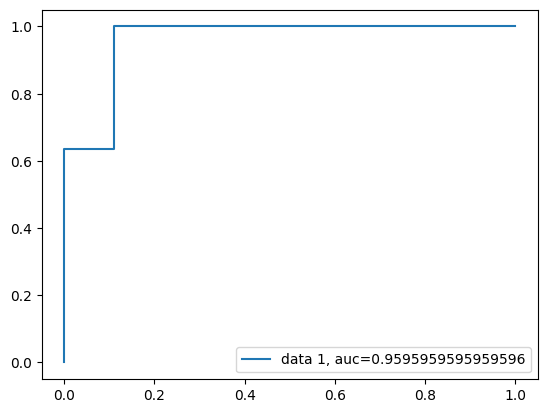

In [ ]:

y_pred_proba = Logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC for the analysis is 0.9595. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

# Step 8. Conclusions
#####* The model got a classification rate of 85%, which is considered a good accuracy.
#####* The prediction precision is 90%. This means that the Logistic Regression model predicts patients with kidney stones 90% of the time.
#####* The Logistic Regression model identify 82% of the time those patients who are in the test dataset.